## Gender Pay Gap in the UK

### Business Understanding

In the UK, employers with 250 or more employees are required to calculate a series of metrics about their gender pay gap and publish them in a yearly report.

This [data](https://gender-pay-gap.service.gov.uk/) is publicly available. In this notebook the reports from 2018/19 will be analyzed since the last complete dataset available.

**Investigation 
Questions:**
1. How balanced are payment amounts by gender?
2. What economic sectors have highest imbalance gender pay gap?
3. Which employer features explain the gender pay gap?
4. Something related with Mean and Median.
4. Something related with Representation.

### Data Understanding

Companies must report the following gender pay gap figures, calculation details can be found [here](https://www.gov.uk/guidance/gender-pay-gap-reporting-make-your-calculations).


| Figure                                                    | Columns                                                                                  |
|:-----------------------------------------------------------|:------------------------------------------------------------------------------------------|
| Mean gender pay gap in hourly pay                         | `DiffMeanHourlyPercent`                                                                    |
| Median gender pay gap in hourly pay                       | `DiffMedianHourlyPercent`                                                                  |
| Mean bonus gender pay gap                                 | `DiffMeanBonusPercent`                                                                     |
| Median bonus gender pay gap                               | `DiffMedianBonusPercent`                                                                   |
| Proportion of males and females receiving a bonus payment |  `(M/F)BonusPercent`                                                                |
| Proportion of males and females in each pay quartile      | `(M/F)LowQuartile, (M/F)LowerMiddleQuartile, (M/F)UpperMiddleQuartile, (M/FUpperQuartile)` |


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.family"] = "serif"

In [2]:
raw = pd.read_csv("data/UK-Gender-Pay-Gap-Data-2018-2019.csv")
rows, cols = raw.shape
print(rows, "x", cols)
raw.columns

10828 x 25


Index(['EmployerName', 'Address', 'CompanyNumber', 'SicCodes',
       'DiffMeanHourlyPercent', 'DiffMedianHourlyPercent',
       'DiffMeanBonusPercent', 'DiffMedianBonusPercent', 'MaleBonusPercent',
       'FemaleBonusPercent', 'MaleLowerQuartile', 'FemaleLowerQuartile',
       'MaleLowerMiddleQuartile', 'FemaleLowerMiddleQuartile',
       'MaleUpperMiddleQuartile', 'FemaleUpperMiddleQuartile',
       'MaleTopQuartile', 'FemaleTopQuartile', 'CompanyLinkToGPGInfo',
       'ResponsiblePerson', 'EmployerSize', 'CurrentName',
       'SubmittedAfterTheDeadline', 'DueDate', 'DateSubmitted'],
      dtype='object')

Apart from gender pay gap figures, the dataset includes company information such as name, size (`EmployerSize`), the industry sectors they belong to (`SicCodes`) and a URL to their writtern report (`CompanyLinkToGPGInfo`). Submission metadata is included too.

In [3]:
columns = raw.columns
non_numeric_cols = ['EmployerName', 'Address', 'CompanyNumber', 'SicCodes',
                    'CompanyLinkToGPGInfo', 'ResponsiblePerson', 'EmployerSize',
                    'CurrentName', 'SubmittedAfterTheDeadline', 'DueDate', 'DateSubmitted']
raw[non_numeric_cols].describe()

,EmployerName,Address,CompanyNumber,SicCodes,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted
count,10828,10828,9486,10328,7433,9136,10828,10828,10828,10828,10828
unique,10828,9564,9486,2004,6258,7515,7,10827,2,2,10706
top,TRAVEL 2 LIMITED,"30 Berners Street, London, England, W1T 3LR",01489613,82990,https://www.capita.com/media/3760/gender-pay-g...,Will Serle (Chief People Officer),250 to 499,CHOICE SUPPORT,False,05/04/2019 00:00:00,30/03/2019 23:59:59
freq,1,23,1,450,30,30,4896,2,10320,9058,8


In [4]:
numeric_cols = [col for col in columns if col not in non_numeric_cols]
raw[numeric_cols].describe()

,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile
count,10828.000000,10828.000000,9072.000000,9072.000000,10828.000000,10828.000000,10828.000000,10828.000000,10828.000000,10828.000000,10828.000000,10828.000000,10828.000000,10828.000000
mean,14.195447,11.897848,18.405037,-1.038779,35.707453,34.380181,46.092372,53.907628,50.158146,49.841854,54.376090,45.623910,60.241365,39.758635
std,14.243800,15.515081,218.986173,295.327384,36.675303,36.378251,24.118756,24.118756,26.191420,26.191420,26.328965,26.328965,24.496928,24.496928
min,-98.700000,-92.300000,-13934.000000,-14490.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.900000,0.900000,0.000000,0.000000,0.700000,0.300000,27.000000,35.500000,29.000000,28.000000,33.000000,22.000000,41.000000,18.000000
50%,13.100000,9.500000,32.100000,15.550000,19.200000,17.150000,44.600000,55.400000,48.000000,52.000000,53.000000,47.000000,62.000000,38.000000
75%,22.400000,21.000000,56.600000,43.000000,75.200000,72.000000,64.500000,73.000000,72.000000,71.000000,78.000000,67.000000,82.000000,59.000000
max,100.000000,100.000000,134.200000,4000.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


Bonus data have minimum and maximum outliers. This will not be fixed since bonuses are not in the scope of the business questions.

In [5]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10828 entries, 0 to 10827
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   EmployerName               10828 non-null  object 
 1   Address                    10828 non-null  object 
 2   CompanyNumber              9486 non-null   object 
 3   SicCodes                   10328 non-null  object 
 4   DiffMeanHourlyPercent      10828 non-null  float64
 5   DiffMedianHourlyPercent    10828 non-null  float64
 6   DiffMeanBonusPercent       9072 non-null   float64
 7   DiffMedianBonusPercent     9072 non-null   float64
 8   MaleBonusPercent           10828 non-null  float64
 9   FemaleBonusPercent         10828 non-null  float64
 10  MaleLowerQuartile          10828 non-null  float64
 11  FemaleLowerQuartile        10828 non-null  float64
 12  MaleLowerMiddleQuartile    10828 non-null  float64
 13  FemaleLowerMiddleQuartile  10828 non-null  flo

Crucial colummns do not miss values (employer size, hourly pay gaps and payment quartiles). `SicCodes` has 4.6% values missing (500/10.828), this problem will be address in the data preparation stage.

### Data Preparation
**Remove Irrelevant columns**

In [6]:
df = raw.drop(columns=['Address','CompanyNumber','DiffMeanBonusPercent',
                       'DiffMedianBonusPercent', 'MaleBonusPercent','FemaleBonusPercent',
                       'CompanyLinkToGPGInfo', 'CurrentName', 'SubmittedAfterTheDeadline',
                       'DueDate', 'DateSubmitted'
                      ])
df.shape

(10828, 14)

**Company Size** The `EmployerSize` column contain 1 of 7 categories.

Text(0.5, 0, 'Number of Companies')

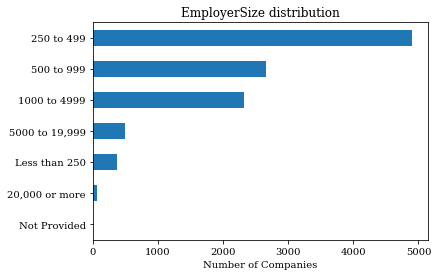

In [7]:
emp_size_dist = df.EmployerSize.value_counts().sort_values()
ax = emp_size_dist.plot.barh(title='EmployerSize distribution')
ax.set_xlabel("Number of Companies")

`EmployerSize` categorical texts will be replaced with the midpoint of the ranges they represent to have numerical. The categorical nature of this column is not affected.

In [8]:
to_replace     = ['Not Provided', 'Less than 250',  '250 to 499',  '500 to 999',
                  '1000 to 4999', '5000 to 19,999', '20,000 or more']
replace_values = [1, 150, 375, 750, 3000, 12500, 40000]
df.EmployerSize = df.EmployerSize.replace(to_replace, replace_values).astype(int)
df.EmployerSize.value_counts().sort_index()

1           9
150       373
375      4896
750      2663
3000     2326
12500     500
40000      61
Name: EmployerSize, dtype: int64

The initial categories (1, 150) and the last categories (12.500, 40.000) draw big differences. Hence, a logarithmic representation is added in order to obtain a linear representation of the sizes, this will be helfpul for the modelling phase.

In [9]:
df['EmployerSizeLog'] = pd.Series(np.log(df.EmployerSize), index=df.index)

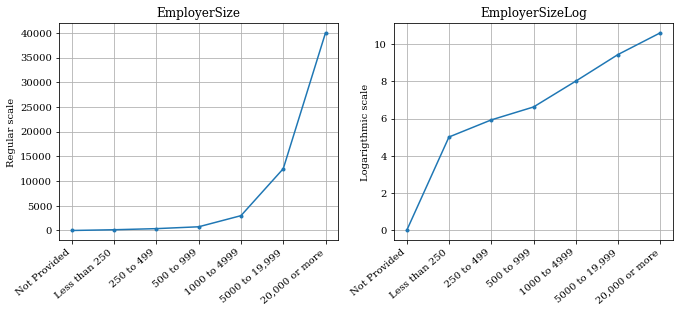

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(11,4))
axs[0].set_title("EmployerSize")
axs[0].set_ylabel("Regular scale")
axs[0].set_xticks(range(8))
axs[0].set_xticklabels(to_replace, rotation=40, ha="right")
axs[0].grid()

axs[0].plot(np.sort(df.EmployerSize.unique()), marker=".")
axs[1].set_title("EmployerSizeLog")
axs[1].set_ylabel("Logarigthmic scale")
axs[1].set_xticks(range(8))
axs[1].set_xticklabels(to_replace, rotation=40, ha="right")
axs[1].grid()
axs[1].plot(range(0,7), np.sort(df.EmployerSizeLog.unique()), marker=".")

**Q1: Payment Balance**
A [violin plot](https://seaborn.pydata.org/generated/seaborn.violinplot.html) is suitable to represent how companies are paying their employees based in payment quartiles. Data granularization is required to plot this.

In [11]:
def extract_quartiles_by_gender(gender_str, df):
    """Returns a data frame only with a gender specific quartile percentages.
    """
    raw_cols = ['LowerQuartile', 'LowerMiddleQuartile', 'UpperMiddleQuartile', 'TopQuartile']
    quartile_cols = [gender_str + quartile for quartile in raw_cols]
    quartiles = df[quartile_cols].copy()
    quartiles.loc[:, 'Sex'] = gender_str
    quartiles.rename(columns={
        quartile_cols[0]: "Lower",
        quartile_cols[1]: "LowerMiddle",
        quartile_cols[2]: "UpperMiddle",
        quartile_cols[3]: "Top",
    }, inplace=True)
    return quartiles

In [12]:
male_quartile   = extract_quartiles_by_gender("Male", df)
female_quartile = extract_quartiles_by_gender("Female", df)
full_quartiles  = male_quartile.append(female_quartile)
print(full_quartiles.shape)
full_quartiles.sample(5)

(21656, 5)


,Lower,LowerMiddle,UpperMiddle,Top,Sex
3289,24.2,23.1,20.3,18.9,Male
8870,53.0,56.6,39.3,33.5,Female
10461,46.2,41.1,21.1,14.4,Female
8372,45.0,64.0,71.0,73.0,Male
5434,12.0,6.0,8.0,9.0,Female


In [13]:
melt_quartiles = pd.melt(full_quartiles, id_vars=['Sex'], var_name='Quartile',
    value_vars=['Lower', 'LowerMiddle', 'UpperMiddle', 'Top'],
    value_name='Percentage'
)
print(melt_quartiles.shape)
melt_quartiles.sample(5)

(86624, 3)


,Sex,Quartile,Percentage
27964,Male,LowerMiddle,90.0
22566,Male,LowerMiddle,24.1
17136,Female,Lower,25.0
46469,Male,UpperMiddle,90.3
38311,Female,LowerMiddle,71.4


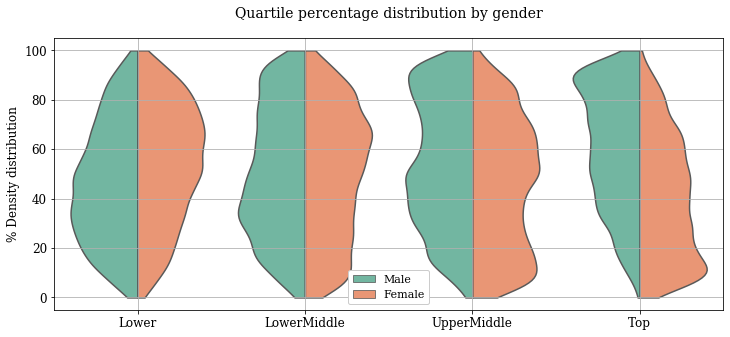

In [14]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.set_title("Quartile percentage distribution by gender", fontsize=14, pad=20)
# sns.despine(left=True, bottom=True)
ax = sns.violinplot(data=melt_quartiles, x="Quartile", y="Percentage", ax=ax, hue="Sex", 
                     cut=0, split=True, inner=None, scale="count", palette="Set2")
plt.tick_params(axis='y', labelsize=12)
plt.tick_params(axis='x', labelsize=12)
plt.grid()
plt.legend(loc='lower center', fontsize=11, framealpha=1)
ax.set_xlabel(None)
ax.set_ylabel('% Density distribution' , fontsize=12)
fig.savefig("plots/quartile-percentage-dist.png", dpi=100)

**Q1 Answer** A balance is found when both curves draw rainbow arcs, meaning that male and female employees are equally present in that payment quartile (smooth mode at 50%). From left to right (also better to worse), the lower quartile is the most balanced one with a slight preference on woman. The greatest imbalance is in the high wage, where men take 80 to 100% of the salaries in the top quartile.

**Q2: Economic activities** Sic Codes are five digit encodings used to classify companies into 21 economic sections which are subdivided into 731 economic sectors. `SicCodes` column contains a list of these codes, with some missing, clutter and incorrect values (`1`).

In [15]:
df.sample(10).SicCodes

5659                                   78300
1204                         55900,\r\n68201
7536                             1,\r\n85320
10435                                    NaN
9298                             1,\r\n85200
528      45111,\r\n45112,\r\n45200,\r\n45310
9310     50200,\r\n52101,\r\n52211,\r\n52241
394      86101,\r\n87100,\r\n87200,\r\n88100
1187                                   29100
4634                                   78109
Name: SicCodes, dtype: object

In order to understand the industrial context of the companies this data should be extended with human undertandable descriptions. For this, [this](https://datahub.io/core/uk-sic-2007-condensed) dataset was downloaded into `data/sic_codes.csv`, it includes the mapping between sections and sectors.

In [16]:
sic_data = pd.read_csv('data/sic_codes.csv')
sic_data.sample(5)

,sic_code,sic_description,section,section_description,sic_version
664,85100,Pre-primary education,P,Education,SIC 2007
444,47730,Dispensing chemist in specialised stores,G,Wholesale and retail trade; repair of motor ve...,SIC 2007
96,13300,Finishing of textiles,C,Manufacturing,SIC 2007
725,97000,Activities of households as employers of domes...,T,Activities of households as employers; undiffe...,SIC 2007
271,28922,Manufacture of earthmoving equipment,C,Manufacturing,SIC 2007


In order to manage SIC sectors and section codes an independent module was implemented.

In [17]:
%load_ext autoreload
import sic_codes as sc
%autoreload 1
%aimport sic_codes

In [18]:
df2 = sc.drop_sic_codes_na(df)
print(df2.shape)
df2 = sc.clean_sic_codes(df2)
df2 = sc.add_sections(df2)
df2[["SicCodes", "SicSections"]].sample(5)

(10328, 15)


,SicCodes,SicSections
7765,[43999],[F]
3666,[82990],[N]
6418,[20200],[C]
5488,[82990],[N]
6834,[10710],[C]


Many SicCodes might be included in the same section `SicSection` might have less values.

(11300, 17)


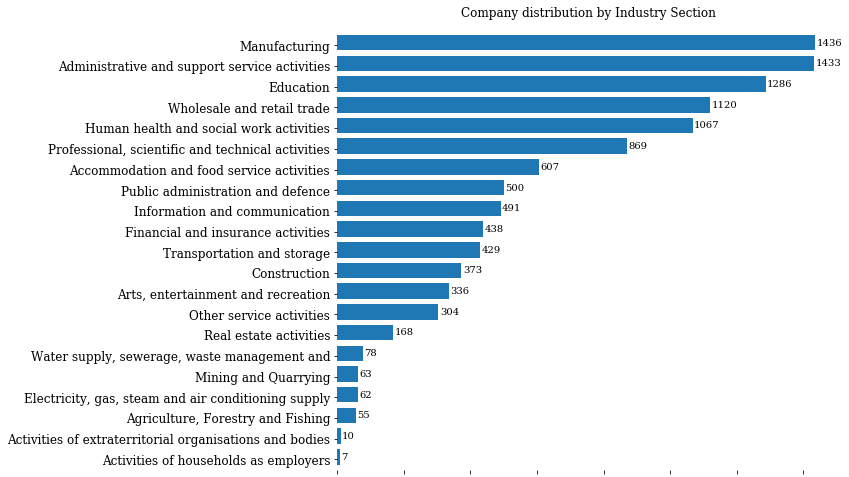

In [19]:
def plot_section_dist(df, title, filename):
    exploded_sections = sc.explode_sections(df)
    print(exploded_sections.shape)

    fig, ax = plt.subplots(1,1, figsize=(9,8))
    ax.set_title(title, fontsize='12', pad=18)
    ax.spines['top'].set_visible(False); ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False); ax.spines['bottom'].set_visible(False)
    plt.tick_params(axis='y', which='both', labelleft=True, labelright=False, labelsize=12)
    plt.tick_params(axis='x', which='both', labeltop=False, labelbottom=False, labelsize=12)

    section_bars = exploded_sections.SectDesc.value_counts().sort_values()

    section_bars.plot(kind='barh', ax=ax)

    for container in ax.containers:
        plt.setp(container, height=0.75)

    for i, v in enumerate(section_bars):
        ax.text(v + 4, i, str(v))
    fig.savefig(f"plots/{filename}-industry-dist.png", bbox_inches="tight", dpi=100)

plot_section_dist(df2, title="Company distribution by Industry Section", filename="general")

(2826, 17)


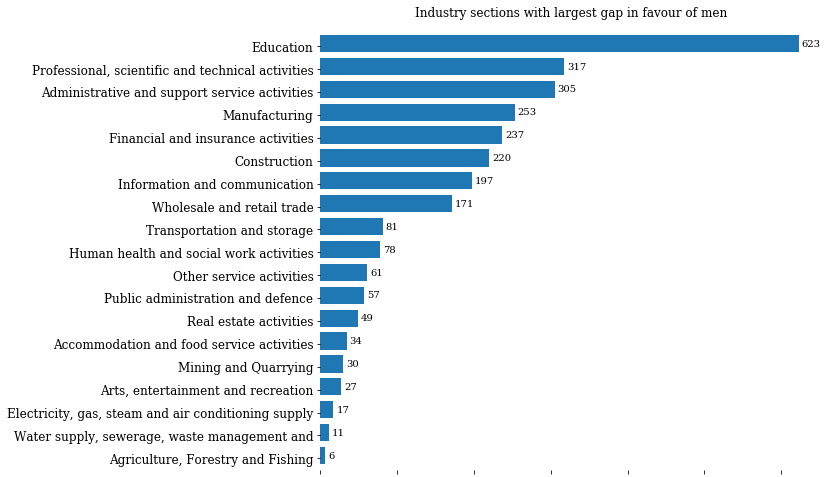

In [20]:
quarter_rows = int(df2.shape[0] / 4)
male_biased   = df2.sort_values(by=['DiffMedianHourlyPercent'], ascending=False) \
                    .head(quarter_rows)
plot_section_dist(male_biased, "Industry sections with largest gap in favour of men", filename="male")

Clearly, this is happening

(2809, 17)


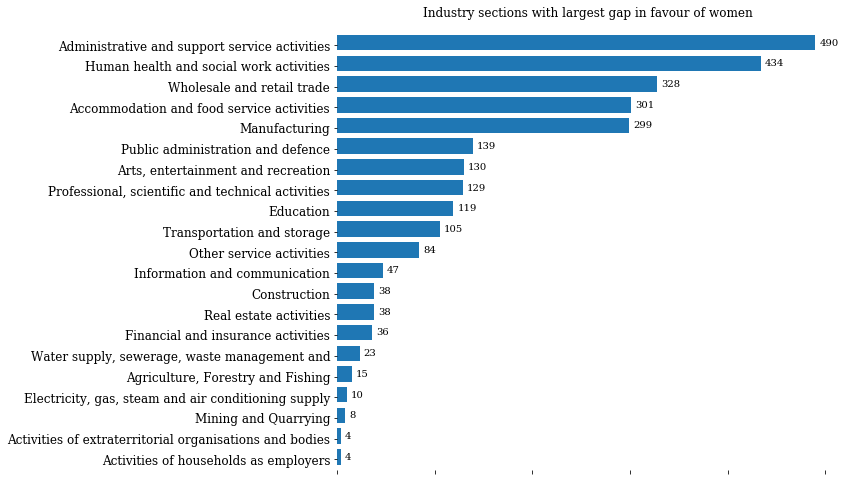

In [21]:
female_biased = df2.sort_values(by=['DiffMedianHourlyPercent']).head(quarter_rows)
plot_section_dist(female_biased, title="Industry sections with largest gap in favour of women", filename="female")

Clearly, this is happening

### Data Modelling

The `sc.split_sections` function drops rows with missing `SicCodes`, and splits the list of industry codes into 20 new columns `SectA`, `SectB` … `SectU` containing binary values where 1 means present and 0 otherwise.

In [23]:
# df3 = sc.split_sectors(df)
# print(df2.shape)


### Results Evaluation

### Results Deployment